In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.stats import stats

## 1. Load and process ACS and county shapefile data
Data profile files 2 thru 5

In [2]:
# ID vars for study
cols = {'NAME'        : 'name',
        'DP02_0002PE' : 'married',
        'DP02_0004PE' : 'cohab',
        'DP02_0005PE' : 'cohab_children',
        'DP02_0016E'  : 'avg_hhsz',
        'DP02_0021PE' : 'pct_unmarpartner',
        'DP02_0024PE' : 'pct_nonrelative',
        'DP02_0068PE' : 'pct_bach',
        'DP02_0093PE' : 'pct_fb',
        'DP03_0009PE' : 'unempl',
        'DP03_0025E'  : 'avg_com',
        'DP03_0033PE' : 'pct_ag',
        'DP03_0035PE' : 'pct_manu',
        'DP03_0062E'  : 'med_inc',
        'DP03_0088E'  : 'inc_pc',
        'DP03_0128PE' : 'pct_pov',
        'DP04_0047PE' : 'pct_rent',
        'DP04_0051PE' : 'pct_moved19',
        'DP04_0052PE' : 'pct_moved1518',
        'DP04_0058PE' : 'pct_no_veh',
        'DP04_0089E'  : 'med_homeval',
        'DP04_0134E'  : 'med_rent',
        'DP05_0001E'  : 'pop',
        'DP05_0004E'  : 'sex_ratio',
        'DP05_0009PE' : 'pct_20_24',
        'DP05_0010PE' : 'pct_25_34',
        'DP05_0019PE' : 'pct_un18',
        'DP05_0024PE' : 'pct_ov65',
        'DP05_0038PE' : 'pct_black',
        'DP05_0044PE' : 'pct_asian',
        'DP05_0071PE' : 'pct_hisp',}

In [3]:
var_names = ','.join(list(cols.keys()))
api_key = 'd9b110204b6db43ea13ad3605d92060b8129450d'
url = 'https://api.census.gov/data/2019/acs/acs5/profile?get=' + var_names + '&for=county:*&key=' + api_key
d_2019 = pd.read_csv(url)
d_2019.sample(5)

,"[[""NAME""",DP02_0002PE,DP02_0004PE,DP02_0005PE,DP02_0016E,DP02_0021PE,DP02_0024PE,DP02_0068PE,DP02_0093PE,DP03_0009PE,...,DP05_0009PE,DP05_0010PE,DP05_0019PE,DP05_0024PE,DP05_0038PE,DP05_0044PE,DP05_0071PE,state,county],Unnamed: 33
"[""Morgan County","Kentucky""",50.8,6.8,1.7,2.39,2.7,1.7,12.5,0.8,6.3,...,5.7,14.9,18.6,16.5,3.4,0.6,1.3,21,175],NaN
"[""Appanoose County","Iowa""",46.7,4.7,2.2,2.30,2.1,2.1,16.3,0.9,6.5,...,4.8,10.6,21.9,22.7,0.7,0.5,2.0,19,007],NaN
"[""Henry County","Tennessee""",50.4,5.8,1.8,2.37,2.6,2.6,16.5,1.1,4.7,...,5.0,10.3,20.7,22.8,8.2,0.4,2.6,47,079],NaN
"[""Henderson County","Tennessee""",50.4,6.2,2.5,2.58,2.3,2.6,14.4,1.1,6.8,...,5.4,11.4,22.8,17.9,7.8,0.1,2.4,47,077],NaN
"[""Boone County","Illinois""",57.3,6.5,3.6,2.86,2.3,2.3,23.5,10.3,6.2,...,6.5,10.7,25.2,15.6,2.2,1.2,21.8,17,007],NaN


In [4]:
# clean dataframe
d_2019.columns = d_2019.columns.str.replace('[','',regex=True).str.replace(']','',regex=True).str.replace('"','',regex=True)
d_2019.index = d_2019.index.str.replace('[','',regex=True).str.replace('"','',regex=True)
d_2019.NAME = d_2019.NAME.replace('"','',regex=True)
d_2019.NAME = d_2019.NAME.str[1:]
d_2019.county = d_2019.county.str.replace(']','',regex=True)
d_2019.drop('Unnamed: 33',axis=1,inplace=True)

In [5]:
# create FIPS col and set index
df = d_2019.copy()

df.loc[:,'state'] = df.state.astype(str).str.zfill(2)
df.loc[:,'county'] = df.county.astype(str).str.zfill(3)
df.loc[:,'fips'] = df.state + df.county
df.fips = df.fips.astype(str)
df.reset_index(inplace=True)
df.set_index('fips',inplace=True)
df.sort_index(inplace=True)

# clean cols
df.drop(['state','county'],axis=1,inplace=True)
df = df.rename(columns=cols)
df.rename(columns={'index':'county','name':'state'},inplace=True)
df.tail(5)

,county,state,married,cohab,cohab_children,avg_hhsz,pct_unmarpartner,pct_nonrelative,pct_bach,pct_fb,...,med_rent,pop,sex_ratio,pct_20_24,pct_25_34,pct_un18,pct_ov65,pct_black,pct_asian,pct_hisp
fips,,,,,,,,,,,,,,,,,,,,,
72145,Vega Baja Municipio,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,496,52192,91.7,6.8,12.6,19.8,19.5,5.0,0.0,96.7
72147,Vieques Municipio,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,627,8642,98.0,6.7,10.5,19.6,21.4,7.5,0.2,94.9
72149,Villalba Municipio,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,405,22403,94.0,7.5,12.2,21.7,16.7,3.5,0.0,99.7
72151,Yabucoa Municipio,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,454,33499,93.7,6.8,11.5,19.3,19.8,78.9,0.0,99.9
72153,Yauco Municipio,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,365,35428,91.8,6.2,11.3,19.1,21.3,3.8,0.0,99.4


In [6]:
# drop PR :(
df = df[df.index.str[:2]!='72']
df.tail(5)

,county,state,married,cohab,cohab_children,avg_hhsz,pct_unmarpartner,pct_nonrelative,pct_bach,pct_fb,...,med_rent,pop,sex_ratio,pct_20_24,pct_25_34,pct_un18,pct_ov65,pct_black,pct_asian,pct_hisp
fips,,,,,,,,,,,,,,,,,,,,,
56037,Sweetwater County,Wyoming,55.0,5.8,3.0,2.77,2.2,3.4,22.5,4.7,...,861,43521,106.8,6.0,13.6,26.5,11.4,1.2,0.8,15.9
56039,Teton County,Wyoming,48.3,9.8,2.4,2.47,4.1,8.6,57.0,11.8,...,1376,23280,112.5,4.6,19.1,19.1,14.0,1.2,1.3,15.0
56041,Uinta County,Wyoming,59.6,4.7,2.0,2.66,2.1,1.7,16.0,2.9,...,698,20479,103.3,5.2,11.9,29.2,13.0,0.1,0.2,9.1
56043,Washakie County,Wyoming,53.9,6.6,2.4,2.34,2.8,1.8,23.4,1.6,...,640,8027,102.6,4.8,9.7,24.6,21.1,0.0,0.0,14.2
56045,Weston County,Wyoming,55.8,5.6,1.4,2.32,2.4,0.8,20.0,1.7,...,767,7049,111.7,5.0,11.8,21.0,19.4,0.2,0.8,1.1


<AxesSubplot:>

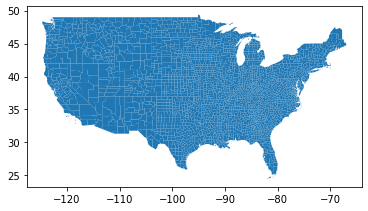

In [7]:
# load county shp
ct = gpd.read_file('/Users/marley/python/processed_shp/cb_2018_us_county_5m')
drop_cols = ['NAME','LSAD','STATEFP','COUNTYFP','COUNTYNS','AFFGEOID','AWATER']
ct.drop(drop_cols,axis=1,inplace=True)

gdf_us = ct.merge(df, how='inner', left_on='GEOID', right_index=True,).set_index('GEOID').sort_index()

# drop AK & HI
gdf_us = gdf_us[(gdf_us.index.str[:2] != '02') & (gdf_us.index.str[:2] != '15')]
gdf_us.plot()

In [8]:
gdf_us

,ALAND,geometry,county,state,married,cohab,cohab_children,avg_hhsz,pct_unmarpartner,pct_nonrelative,...,med_rent,pop,sex_ratio,pct_20_24,pct_25_34,pct_un18,pct_ov65,pct_black,pct_asian,pct_hisp
GEOID,,,,,,,,,,,,,,,,,,,,,
01001,1539602123,"POLYGON ((-86.91759 32.66417, -86.81657 32.660...",Autauga County,Alabama,54.3,3.4,0.7,2.56,1.4,2.0,...,986,55380,94.7,6.4,12.7,23.8,15.0,19.0,1.0,2.8
01003,4117546676,"POLYGON ((-88.02927 30.22271, -88.02399 30.230...",Baldwin County,Alabama,53.0,4.1,1.1,2.59,1.6,2.6,...,1020,212830,94.7,5.1,11.2,21.7,20.0,9.3,0.9,4.6
01005,2292144655,"POLYGON ((-85.74142 31.61961, -85.72983 31.632...",Barbour County,Alabama,42.4,3.6,2.1,2.41,1.5,1.6,...,576,25361,112.4,6.3,14.4,20.9,18.6,47.6,0.5,4.4
01007,1612167481,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",Bibb County,Alabama,50.7,2.2,0.8,2.99,0.8,2.2,...,734,22493,117.5,5.6,14.6,20.6,15.9,22.3,0.1,2.6
01009,1670103911,"POLYGON ((-86.96336 33.85822, -86.92020 33.873...",Blount County,Alabama,57.1,2.2,0.8,2.74,0.9,2.0,...,667,57681,97.6,5.6,11.9,23.2,17.9,1.6,0.4,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,27005754244,"POLYGON ((-110.05371 42.27074, -109.54300 42.2...",Sweetwater County,Wyoming,55.0,5.8,3.0,2.77,2.2,3.4,...,861,43521,106.8,6.0,13.6,26.5,11.4,1.2,0.8,15.9
56039,10351784301,"POLYGON ((-111.05533 44.66626, -111.00075 44.6...",Teton County,Wyoming,48.3,9.8,2.4,2.47,4.1,8.6,...,1376,23280,112.5,4.6,19.1,19.1,14.0,1.2,1.3,15.0
56041,5391631764,"POLYGON ((-111.04655 41.25163, -111.04655 41.2...",Uinta County,Wyoming,59.6,4.7,2.0,2.66,2.1,1.7,...,698,20479,103.3,5.2,11.9,29.2,13.0,0.1,0.2,9.1


In [9]:
# add USDA typology and religious affiliation data
df_typ = pd.read_csv('data/2015CountyTypologyCodes.csv', index_col='FIPStxt')
df_rel = pd.read_csv('data/U.S. Religion Census Religious Congregations and Membership Study_2010.csv',
                      index_col='FIPS')

In [10]:
# retain relevant data
rel = df_rel.loc[:,['TOTRATE', 'EVANRATE', 'BPRTRATE', 'LDSRATE', 'MSLMRATE']]

typ = df_typ.loc[:,['Economic_Type_Label',
                    'Metro-nonmetro status, 2013 0=Nonmetro 1=Metro',
                    'Farming_2015_Update',
                    'Mining_2015-Update',
                    'Manufacturing_2015_Update',
                    'Government_2015_Update',
                    'Recreation_2015_Update',
                    'Nonspecialized_2015_Update']]

# rename typ cols using dict
typ.rename(columns={'Metro-nonmetro status, 2013 0=Nonmetro 1=Metro' : 'Metro_Status'},inplace=True)

# Shannon County, NE changed to Oglala Lakota County and needs new FIPS
rel.rename(index={46113:46102},inplace=True)
typ.rename(index={46113:46102},inplace=True)

In [11]:
# add MIT 2016 election voting data
votes = pd.read_csv('data/countypres_dem_2016.csv',)
votes.county_fips.dropna(inplace=True)
votes.county_fips = votes.county_fips.astype(str).str[:-2].str.zfill(5)
mask = (votes['year'] == 2016) & (votes['state'] != 'ALASKA') & (votes['state'] != 'HAWAII') & (votes['party'] == 'DEMOCRAT')
dem16 = votes.copy().loc[mask]
dem16.loc[:,'pct_dem'] = dem16['candidatevotes'] / dem16['totalvotes']
dem16.rename(index={46113:46102},inplace=True)
dem16.set_index('county_fips',inplace=True)

In [12]:
# merge with each other
temp = typ.merge(rel, how='right', left_index=True, right_index=True)

# merge with voter data
temp.index = temp.index.astype(str).str.zfill(5)
temp2 = temp.merge(dem16['pct_dem'], how='left', left_index=True, right_index=True)

In [13]:
# merge with gdf
gdf = gdf_us.merge(temp2, how='left', left_index=True, right_index=True)
gdf.sample(5)

,ALAND,geometry,county,state,married,cohab,cohab_children,avg_hhsz,pct_unmarpartner,pct_nonrelative,...,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,TOTRATE,EVANRATE,BPRTRATE,LDSRATE,MSLMRATE,pct_dem
GEOID,,,,,,,,,,,,,,,,,,,,,
36001,1354120790,"POLYGON ((-74.26486 42.41986, -74.24446 42.470...",Albany County,New York,39.5,7.6,2.0,2.29,3.3,3.9,...,0.0,1.0,0.0,0.0,452.208889,52.178889,9.000000,4.098889,15.008889,0.594129
05027,1983889572,"POLYGON ((-93.49052 33.01844, -93.48176 33.259...",Columbia County,Arkansas,43.5,6.1,3.2,2.57,2.3,3.6,...,1.0,0.0,0.0,0.0,529.278889,304.938889,125.530000,9.490000,NaN,0.353325
20121,1491519075,"POLYGON ((-95.06553 38.51655, -95.06524 38.608...",Miami County,Kansas,58.1,4.1,1.7,2.55,1.6,2.3,...,0.0,0.0,0.0,1.0,490.768889,164.030000,1.070000,25.218889,NaN,0.265677
20055,3372157849,"POLYGON ((-101.10327 38.26456, -100.68470 38.2...",Finney County,Kansas,51.0,6.0,3.7,2.89,2.1,2.9,...,1.0,0.0,0.0,0.0,501.578889,161.680000,5.468889,19.198889,8.380000,0.314499
48035,2545908079,"POLYGON ((-97.86486 32.08733, -97.63088 32.207...",Bosque County,Texas,59.2,6.8,3.3,2.49,2.4,1.5,...,0.0,0.0,0.0,0.0,547.830000,351.688889,NaN,NaN,NaN,0.163052


In [14]:
# calculate pop density (pop/km) and adults aged 20-34 variables
gdf['pop_dens'] = gdf['pop'] / (gdf['ALAND'] * 10**-6)
gdf['pct_20_34'] = gdf['pct_20_24'] + gdf['pct_25_34']

In [15]:
# export
gdf.to_file('counties_acs',driver ='ESRI Shapefile')

/var/folders/zt/6n98kvbj18gbkhpx3fc08jx80000gn/T/ipykernel_4889/3212861833.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('counties_acs',driver ='ESRI Shapefile')


In [16]:
gdf.columns

Index(['ALAND', 'geometry', 'county', 'state', 'married', 'cohab',
       'cohab_children', 'avg_hhsz', 'pct_unmarpartner', 'pct_nonrelative',
       'pct_bach', 'pct_fb', 'unempl', 'avg_com', 'pct_ag', 'pct_manu',
       'med_inc', 'inc_pc', 'pct_pov', 'pct_rent', 'pct_moved19',
       'pct_moved1518', 'pct_no_veh', 'med_homeval', 'med_rent', 'pop',
       'sex_ratio', 'pct_20_24', 'pct_25_34', 'pct_un18', 'pct_ov65',
       'pct_black', 'pct_asian', 'pct_hisp', 'Economic_Type_Label',
       'Metro_Status', 'Farming_2015_Update', 'Mining_2015-Update',
       'Manufacturing_2015_Update', 'Government_2015_Update',
       'Recreation_2015_Update', 'Nonspecialized_2015_Update', 'TOTRATE',
       'EVANRATE', 'BPRTRATE', 'LDSRATE', 'MSLMRATE', 'pct_dem', 'pop_dens',
       'pct_20_34'],
      dtype='object')

## 2. Preliminary analysis
### 2.1. Summary stats

In [17]:
# choose cols relevent to this version of the study
subcols = ['GEO_ID', 'NAME', 'married', 'cohab', 'cohab_children', 'pct_unmarpartner',
           'pct_nonrelative', 'pct_educ', 'pct_fb', 'unempl', 'pct_ag', 'pct_manu',
           'gini', 'med_inc', 'inc_pc', 'pct_pov', 'pct_rent', 'pop_dens',
           'pct_20_34', 'pct_black', 'pct_asian', 'pct_hisp']

subvars = ['married', 'cohab', 'pct_bach', 'pct_fb', 'med_inc', 'pop_dens',
           'pct_pov', 'med_rent', 'pct_20_34', 'pct_black','pct_hisp', 'TOTRATE', 'pct_dem']

In [18]:
# summary stats table for all counties
pd.DataFrame(gdf[subvars].describe().round(2)).T

,count,mean,std,min,25%,50%,75%,max
married,3108.0,50.61,6.79,2.130000e+01,46.90,51.00,54.80,80.40
cohab,3108.0,5.80,1.84,0.000000e+00,4.60,5.80,7.00,16.60
pct_bach,3108.0,21.95,9.58,0.000000e+00,15.30,19.55,26.00,77.60
pct_fb,3108.0,4.73,5.68,0.000000e+00,1.40,2.70,5.60,53.70
med_inc,3108.0,53305.43,14104.23,2.150400e+04,44124.25,51658.00,59584.00,142299.00
pop_dens,3108.0,105.73,699.85,6.000000e-02,6.70,17.43,45.72,27811.51
pct_pov,3108.0,15.13,6.31,2.400000e+00,10.70,14.20,18.50,55.50
med_rent,3108.0,-857230.89,23905011.83,-6.666667e+08,631.00,714.00,844.00,2316.00
pct_20_34,3108.0,17.95,3.80,3.700000e+00,15.70,17.40,19.50,44.00
pct_black,3108.0,9.16,14.56,0.000000e+00,0.70,2.30,10.30,87.20


### 2.2. Spatial Analysis

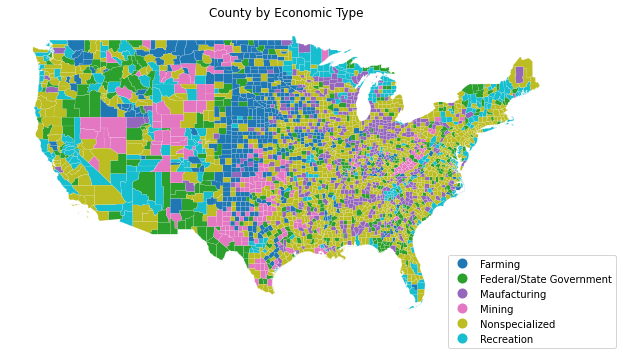

In [19]:
# plot
graph = 'Economic_Type_Label'
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax,
         column=graph,
         edgecolor='white',
         linewidth=0.1,
         legend=True,
         legend_kwds={'loc': 'lower right',
                      'bbox_to_anchor' : (1.1, -.1)})

plt.title(label='County by Economic Type')
ax.set_axis_off()
fig.savefig('output/econtype.png', dpi=600, bbox_inches='tight')

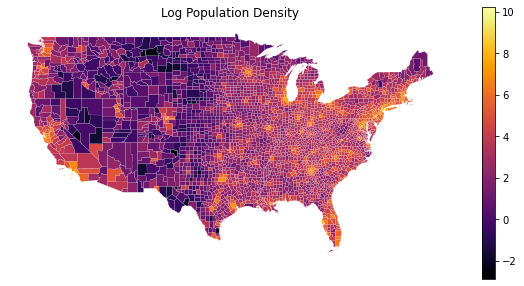

In [20]:
# plot log pop dens)
gdf['log_pop'] = np.log(gdf['pop'])
gdf['log_pop_dens'] = np.log(gdf['pop_dens'])

graph = 'log_pop_dens'
fig, ax = plt.subplots(figsize=(10, 10))
g = gdf.plot(ax=ax,
             column=graph,
             cmap='inferno',
             edgecolor='white',
             linewidth=0.1,
             legend=True,
             legend_kwds={'shrink': 0.5})

plt.title(label='Log Population Density')
ax.set_axis_off()
fig.savefig('output/logpopdens.png', dpi=600, bbox_inches='tight')

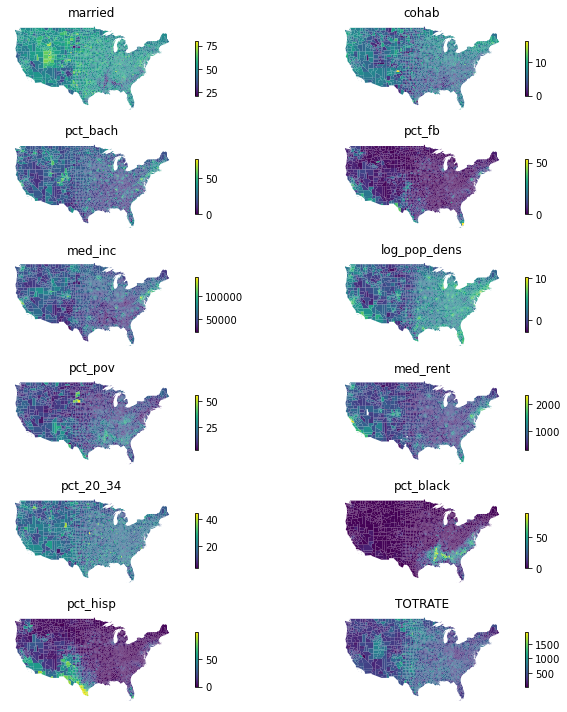

In [21]:
gdf.loc[gdf.med_rent<0,'med_rent'] = np.NaN

subvars = ['married', 'cohab', 'pct_bach', 'pct_fb', 'med_inc', 'log_pop_dens',
           'pct_pov', 'med_rent', 'pct_20_34', 'pct_black','pct_hisp', 'TOTRATE', 'pct_dem']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 10))
for col, ax in zip(subvars, axes.flat):
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'{col}')
    #gdf = tvals.dropna(subset=[col], axis='rows')
    ax = gdf.plot(ax=ax,
                  column=col,
                  cmap='viridis',
                  legend=True,
                  legend_kwds={'shrink': 0.6})
fig.tight_layout()

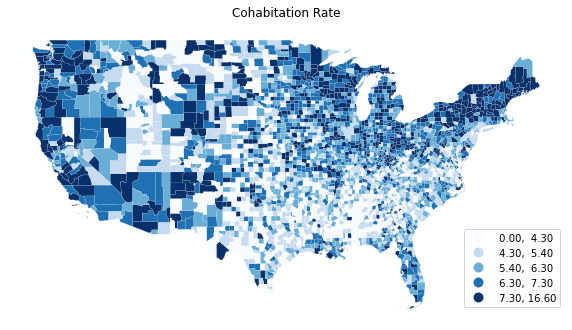

In [22]:
# plot cohabitation rate
graph = 'cohab'
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax,
         column=graph,
         scheme='Quantiles',
         cmap='Blues',
         edgecolor='white',
         linewidth=0.1,
         legend=True,
         legend_kwds={'bbox_to_anchor': (1,.33)})

plt.title(label='Cohabitation Rate')
ax.set_axis_off()

## 3. Global regression

In [23]:
import statsmodels.api as sm
import pysal as ps

/Users/marley/opt/miniconda3/envs/ppd599/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/marley/opt/miniconda3/envs/ppd599/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [24]:
# Bivariate regression

# filter full dataset to retain only these columns and only rows without nulls in these columns
data = gdf[['cohab', 'pct_20_34']].dropna()

# create design matrix and response vector
X = data['pct_20_34']
y = data['cohab']

# estimate a simple linear regression model with OLS, using statsmodels
model = sm.OLS(y, sm.add_constant(X),)# cov_type='HC3_se')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  cohab   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           6.88e-26
Time:                        13:27:01   Log-Likelihood:                -6257.4
No. Observations:                3108   AIC:                         1.252e+04
Df Residuals:                    3106   BIC:                         1.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1757      0.157     26.635      0.0

In [25]:
# Multivariate regression
response = 'cohab'
predictors = ['pct_20_34', 'pct_bach', 'pct_pov', 'unempl', 'pct_manu', 
              'pct_black', 'pct_hisp', 'sex_ratio',
              'log_pop_dens', 'Recreation_2015_Update', 'TOTRATE']

# filter full dataset to retain only these columns and only rows without nulls in these columns
data = gdf[[response] + predictors].dropna()

# create design matrix and response vector
X = data[predictors]
y = data[response]

# estimate a simple linear regression model with OLS, using statsmodels
model = sm.OLS(y, sm.add_constant(X), cov_type='HC3')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  cohab   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     66.27
Date:                Mon, 05 Jun 2023   Prob (F-statistic):          1.80e-133
Time:                        13:27:01   Log-Likelihood:                -5984.2
No. Observations:                3108   AIC:                         1.199e+04
Df Residuals:                    3096   BIC:                         1.206e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

## Spatial weights matrix

In [26]:
# compute spatial weights for outcomes and then row-standardize
w_queen = ps.lib.weights.Queen.from_dataframe(gdf[['cohab', 'geometry']])
w_queen.set_transform('R')

('WARNING: ', 1192, ' is an island (no neighbors)')
('WARNING: ', 2946, ' is an island (no neighbors)')


/Users/marley/opt/miniconda3/envs/ppd599/lib/python3.9/site-packages/pysal/lib/weights/weights.py:167: UserWarning: There are 2 disconnected observations 
  Island ids: 1192, 2946
  warnings.warn("There are %d disconnected observations" % ni + ' \n '


In [27]:
# pick a variable to investigate and drop null rows
col = 'cohab'
tracts_not_null = gdf[[col, 'geometry']].dropna()
y = tracts_not_null[col]

In [28]:
# compute spatial lag
y_lag = ps.lib.weights.lag_spatial(w_queen, y)

In [29]:
# is a tract's med income similar to those of its neighbors?
col_lag = f'{col}_lag'
data_lag = pd.DataFrame(data={col:y, col_lag:y_lag}).astype(float)
data_lag

,cohab,cohab_lag
GEOID,,
01001,3.4,4.760000
01003,4.1,3.716667
01005,3.6,3.712500
01007,2.2,4.033333
01009,2.2,3.883333
...,...,...
56037,5.8,5.212500
56039,9.8,5.237500
56041,4.7,4.075000


In [30]:
# calculate the statistic
mi = ps.explore.esda.Moran(data_lag[col], w_queen)

# Moran's I
print(mi.I)

# p value
print(mi.p_sim)

0.34414495534545836
0.001


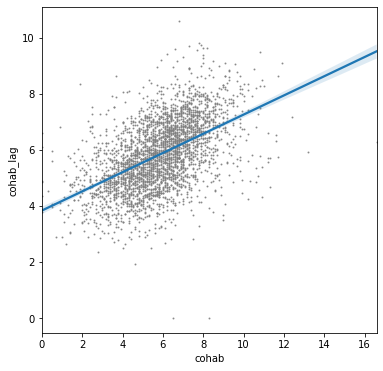

In [31]:
# Moran scatterplot
fig, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x=col, y=col_lag, data=data_lag, scatter_kws={'s':1, 'color':'gray'})
plt.show()

In [32]:
# Standardize outcome of interest
y_std = (y - y.mean()) / y.std()
y_std.head()

GEOID
01001   -1.303127
01003   -0.923679
01005   -1.194713
01007   -1.953609
01009   -1.953609
Name: cohab, dtype: float64

In [33]:
# Compute spatial lag of standardized values and save as series with same index
y_std_lag = pd.Series(ps.lib.weights.lag_spatial(w_queen, y_std),
                      index=y_std.index,
                      name=col_lag)
y_std_lag.head()

GEOID
01001   -0.565914
01003   -1.131472
01005   -1.133730
01007   -0.959817
01009   -1.041127
Name: cohab_lag, dtype: float64

In [34]:
# estimate a simple linear regression model
m, b, r, p, se = stats.linregress(x=y_std, y=y_std_lag)
print('m={:.4f}, b={:.4f}, r^2={:.4f}, p={:.4f}'.format(m, b, r ** 2, p))

m=0.3439, b=0.0091, r^2=0.2674, p=0.0000


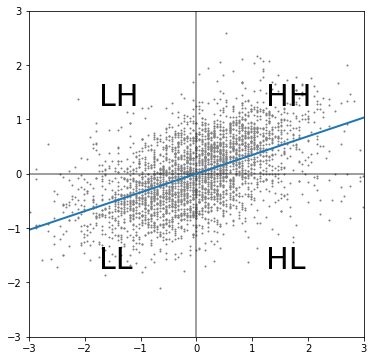

In [35]:
# standardized moran's plot again, from above, but labeled this time
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x=y_std, y=y_std_lag, s=1, color='gray')

# draw quadrants and ignore outliers beyond 3 std devs
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# label the quadrants
ax.text(1.25, 1.25, 'HH', fontsize=30)
ax.text(1.25, -1.75, 'HL', fontsize=30)
ax.text(-1.75, 1.25, 'LH', fontsize=30)
ax.text(-1.75, -1.75, 'LL', fontsize=30)

# draw a line with moran's I as the slope
Xs = pd.Series([-3, 3])
Ys = Xs * mi.I
line = ax.plot(Xs, Ys, lw=2)

In [36]:
# calculate LISA values using the queen spatial weights
lisa = ps.explore.esda.Moran_Local(data_lag[col], w_queen)

In [37]:
# set significance threshold (alpha)
alpha = 0.05

# identify whether each observation is significant or not
data_lag['significant'] = lisa.p_sim < alpha
data_lag['significant'].value_counts()

False    2151
True      957
Name: significant, dtype: int64

In [38]:
# identify the quadrant each observation belongs to
data_lag['quadrant'] = lisa.q
data_lag['quadrant'] = data_lag['quadrant'].replace({1:'HH', 2:'LH', 3:'LL', 4:'HL'})
data_lag['quadrant'].sort_values().value_counts()

LL    1109
HH    1080
HL     463
LH     456
Name: quadrant, dtype: int64

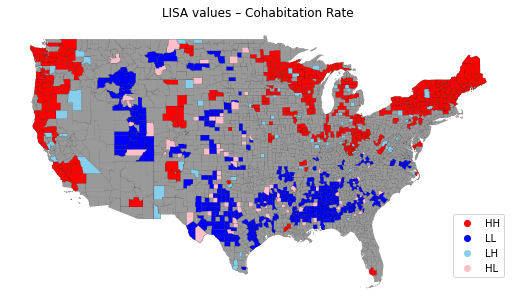

In [39]:
fig, ax = plt.subplots(figsize=(9, 9))

# merge original tracts and LISA quadrants data together, plot tracts basemap
gdf_lisa = gdf.merge(data_lag, how='left', left_index=True, right_index=True)
gdf_lisa.plot(ax=ax, facecolor='#999999', edgecolor='k', linewidth=0.1, legend=True)

# plot each quandrant's tracts (if significant LISA) in a different color
quadrant_colors = {'HH':'r', 'LL':'b', 'LH':'skyblue', 'HL':'pink'}
for q, c in quadrant_colors.items():
    mask = gdf_lisa['significant'] & (gdf_lisa['quadrant']==q)
    rows = gdf_lisa.loc[mask]
    rows.plot(ax=ax, color=c, edgecolor='k', linewidth=0.1,
              legend=True, legend_kwds={'bbox_to_anchor': (1,.33)})

    
plt.title(label='LISA values – Cohabitation Rate')
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in quadrant_colors.values()]
plt.legend(markers, quadrant_colors.keys(), numpoints=1, bbox_to_anchor=(1,.33))
ax.axis('off')
plt.show()
#fig.savefig('output/LISA_unmarriedpartner.png', dpi=600, bbox_inches='tight')

In [40]:
# save data
gdf.to_file('data/outputs/683data',driver ='ESRI Shapefile')
gdf.to_csv('data/outputs/683data.csv')

/var/folders/zt/6n98kvbj18gbkhpx3fc08jx80000gn/T/ipykernel_4889/2472077704.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('data/outputs/683data',driver ='ESRI Shapefile')
